# QSOs FITS

Import necessary libraries 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd 
import os
from urllib import request
import ssl
from astropy.io import fits



Function to download data from a txt file with links 

In [101]:
file = "download_url.7.txt"
def Download_data(file,n):
    files = "FITS_data"
    f = open(file,"r")
    ssl._create_default_https_context = ssl._create_unverified_context
    try:
        os.mkdir(files)
    except OSError:
        print("Creation of the directory %s already was done" % files)
    else:
        print ("Successfully created the directory %s" % files)
        
    for i in f.readlines()[0:n]:
        print(i[-26:-1])
        request.urlretrieve(i, files+"/"+i[-26:-1])


Download_data(file,50)

Creation of the directory FITS_data already was done
spec-0288-52000-0266.fits
spec-0514-51994-0450.fits
spec-0597-52059-0604.fits
spec-0599-52317-0297.fits
spec-0599-52317-0483.fits
spec-0777-52320-0058.fits
spec-0777-52320-0116.fits
spec-0778-52337-0231.fits
spec-0778-52337-0504.fits
spec-0778-54525-0229.fits
spec-0778-54525-0507.fits
spec-0840-52374-0047.fits
spec-0841-52375-0411.fits
spec-0880-52367-0491.fits
spec-0881-52368-0206.fits
spec-0884-52374-0268.fits
spec-0952-52409-0035.fits
spec-0968-52412-0229.fits
spec-0970-52413-0120.fits
spec-1015-52709-0084.fits
spec-1015-52734-0085.fits
spec-1229-52723-0397.fits
spec-1229-52723-0409.fits
spec-1314-52792-0419.fits
spec-1314-52792-0477.fits
spec-1314-53050-0420.fits
spec-1314-53050-0472.fits
spec-1367-53083-0419.fits
spec-1367-53083-0424.fits
spec-1368-53084-0518.fits
spec-1368-53084-0555.fits
spec-1368-53084-0565.fits
spec-1369-53089-0392.fits
spec-1369-53089-0581.fits
spec-1369-53089-0611.fits
spec-1444-53054-0011.fits
spec-1444-5

Save data the plot data and make a few plots

In [9]:
datadir = "FITS_data/"
I = []
for i in range(len(os.listdir(datadir))):
    I.append(fits.open(datadir+os.listdir(datadir)[i]))


X = [];Y = [];titles =[]

for img in range(len(os.listdir(datadir))):
    X.append(np.array([I[img][1].data[i][1] for i in range(len(I[img][1].data))]))
    Y.append(np.array([I[img][1].data[i][0] for i in range(len(I[img][1].data))]))
    titles.append(os.listdir(datadir)[img])



In [ ]:
hα = 6563 #Amstrong 
O3 = 5007 #Amstrong 
hβ = 4861 #Amstrong

fig, ax = plt.subplots(25, 4, figsize = (12, 36))
fig.suptitle('Some spectrums')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
fig.tight_layout()
for x, y in [(i,j) for i in range(25) for j in range (4)]:
    ax[x,y].plot(X[x+y],Y[x+y],"b-")
    ax[x,y].grid(True)
    ax[x,y].set_title(titles[x+y])
    #ax[x,y].set_axvline(x=hα, color='r', linestyle='-')
    #ax[x,y].set_axvline(x=O3, color='g', linestyle='-')
    #ax[x,y].set_axvline(x=hβ, color='y', linestyle='-')


In [82]:
I[0]

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x118e39320>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11924eba8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x118dffcf8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11a3f2320>]

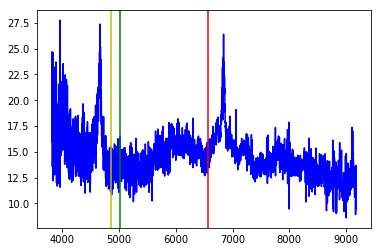

In [83]:
plt.plot(10**X[1],Y[1],"b")
hα = 6563 #Amstrong 
O3 = 5007 #Amstrong 
hβ = 4861 #Amstrong
plt.axvline(x=hα, color='r', linestyle='-')
plt.axvline(x=O3, color='g', linestyle='-')
plt.axvline(x=hβ, color='y', linestyle='-')

In [99]:
tabla = pd.read_csv("PRUEBA7.csv",delimiter=",")
tabla["z"]

0      1.017060
1      0.299713
2      0.299645
3      0.060983
4      0.061078
5      0.491609
6      1.820070
7      1.931240
8      1.930120
9      0.736597
10     0.736525
11     0.529927
12     0.529861
13     0.530176
14     0.529764
15     1.263930
16     1.263630
17     0.804303
18     1.441180
19     2.135810
20     1.624080
21     1.630610
22     0.307236
23     0.307108
24     0.519425
25     0.114864
26     0.115114
27     2.615520
28     2.615010
29     0.706472
         ...   
137    0.514757
138    2.113220
139    2.111580
140    0.063490
141    2.882070
142    2.310890
143    2.313960
144    2.703720
145    2.707320
146    1.499270
147    1.500510
148    1.024170
149    1.086770
150    2.048000
151    2.375280
152    2.370900
153    2.206070
154    2.202840
155    2.209950
156    2.265700
157    2.268560
158    1.499250
159    1.498590
160    2.698760
161    2.700760
162    1.871800
163    1.127150
164    1.126540
165    2.196960
166    2.198010
Name: z, Length: 167, dt